Thí nghiệm so sánh với các toán tử khác (**Tournament Selection, Multi-point Crossover, Gaussian Mutation**)

**Test 1:** Elitism Selection, Uniform Crossover, Bit-flip Mutation

**Test 2:** Tournament Selection, Multi-point Crossover, Gaussian Mutation

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
POPULATION_SIZE = 200  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ

In [ ]:
items = []  # Vật phẩm chứa weights và values
fitness_history = []  # Danh sách lưu trữ giá trị fitness của các cá thể tốt nhất qua từng thế hệ.

In [ ]:
# --- Hàm chung ---
def get_user_input():
    global items, max_capacity, CROSSOVER_RATE, MUTATION_RATE

    # Dữ liệu đầu vào
    weights_str = input("Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): ")
    values_str = input("Nhập danh sách giá trị (phân tách bằng dấu phẩy): ")
    max_capacity = int(input("Nhập sức chứa tối đa: "))
    CROSSOVER_RATE = float(input("Nhập tỷ lệ lai ghép (0-1): "))
    MUTATION_RATE = float(input("Nhập tỷ lệ đột biến (0-1): "))

    weights = list(map(int, weights_str.split(",")))
    values = list(map(int, values_str.split(",")))
    items = list(zip(weights, values))

    return items, max_capacity, CROSSOVER_RATE, MUTATION_RATE


def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0


def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]


# --- Test 1: Elitism Selection, Uniform Crossover, Bit Flip Mutation ---
def elitism_selection(population):
    return sorted(population, key=lambda ind: fitness(ind), reverse=True)[:POPULATION_SIZE]


def uniform_crossover(parent1, parent2):
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i], child2[i] = parent2[i], parent1[i]
    return child1, child2


def bit_flip_mutation(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual


# --- Test 2: Tournament Selection, Multi-point Crossover, Gaussian Mutation ---
def tournament_selection(population, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        best = max(tournament, key=lambda ind: fitness(ind))
        selected.append(best)
    return selected


def multi_point_crossover(parent1, parent2, num_points=2):
    points = sorted(random.sample(range(1, len(parent1)), num_points))
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(points)):
        start = points[i]
        end = points[i + 1] if i + 1 < len(points) else len(parent1)
        if i % 2 == 0:
            child1[start:end], child2[start:end] = parent2[start:end], parent1[start:end]
    return child1, child2


def gaussian_mutation(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = min(max(0, round(individual[i] + random.gauss(0, 0.5))), 1)
    return individual


# --- Genetic Algorithm ---
def genetic_algorithm(selection, crossover, mutation):
    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))
    best_fitness_history = []
    mean_fitness_history = []

    for gen in range(GENERATIONS):
        selected_population = selection(population)
        offspring = []

        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                offspring.extend([child1, child2])

        offspring = [mutation(ind) for ind in offspring]
        population.extend(offspring)
        population = sorted(population, key=lambda ind: fitness(ind), reverse=True)[:POPULATION_SIZE]

        best_fitness = fitness(population[0])
        mean_fitness = sum(fitness(ind) for ind in population) / len(population)

        best_fitness_history.append(best_fitness)
        mean_fitness_history.append(mean_fitness)

    return best_individual, fitness(best_individual), best_fitness_history, mean_fitness_history

**Test Case 5:**

- weights = [879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493]

- values = [3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953]

- items = 41

- Best fitness = 79009

- Max Capacity = 50000

In [ ]:
# --- Main Program ---
items, max_capacity, CROSSOVER_RATE, MUTATION_RATE = get_user_input()

# Test 1
_, _, best_fitness_history_test1, mean_fitness_history_test1 = genetic_algorithm(
    elitism_selection, uniform_crossover, bit_flip_mutation)

# Test 2
_, _, best_fitness_history_test2, mean_fitness_history_test2 = genetic_algorithm(
    tournament_selection, multi_point_crossover, gaussian_mutation)

Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): 879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493
Nhập danh sách giá trị (phân tách bằng dấu phẩy): 3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953
Nhập sức chứa tối đa: 50000
Nhập tỷ lệ lai ghép (0-1): 0.8
Nhập tỷ lệ đột biến (0-1): 0.04


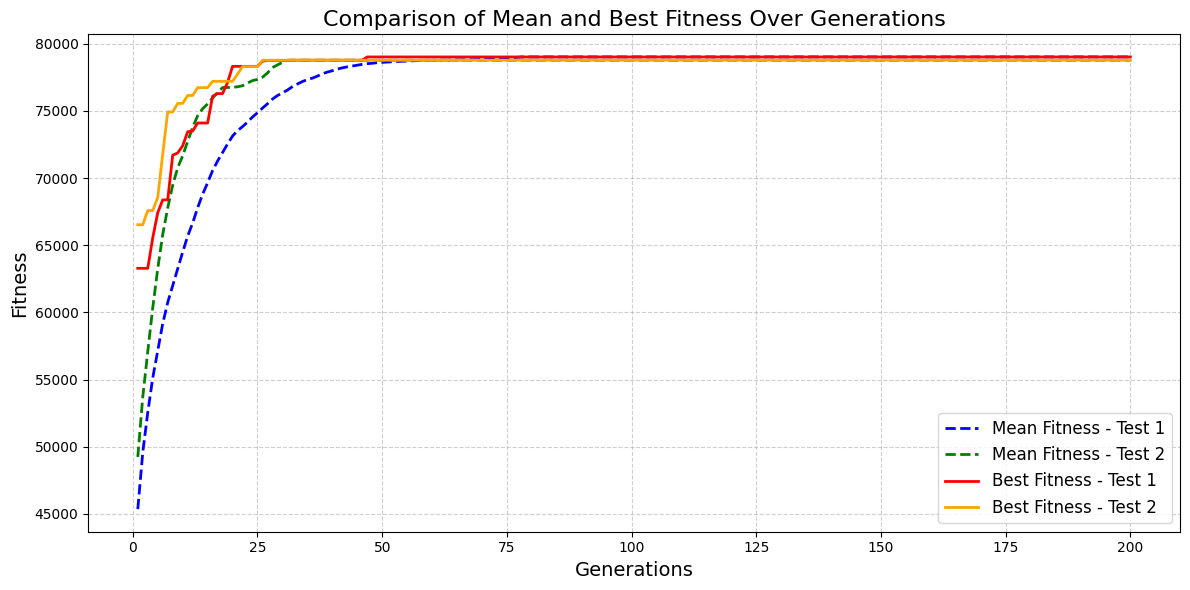

In [ ]:
# --- Plot Mean Fitness and Best Fitness ---
plt.figure(figsize=(12, 6))

# Plot Mean Fitness for Test 1 and Test 2
plt.plot(range(1, len(mean_fitness_history_test1) + 1), mean_fitness_history_test1, label="Mean Fitness - Test 1", color='blue', linestyle='--', linewidth=2)
plt.plot(range(1, len(mean_fitness_history_test2) + 1), mean_fitness_history_test2, label="Mean Fitness - Test 2", color='green', linestyle='--', linewidth=2)

# Plot Best Fitness for Test 1 and Test 2
plt.plot(range(1, len(best_fitness_history_test1) + 1), best_fitness_history_test1, label="Best Fitness - Test 1", color='red', linestyle='-', linewidth=2)
plt.plot(range(1, len(best_fitness_history_test2) + 1), best_fitness_history_test2, label="Best Fitness - Test 2", color='orange', linestyle='-', linewidth=2)

# Thêm các thông tin vào đồ thị
plt.title("Comparison of Mean and Best Fitness Over Generations", fontsize=16)
plt.xlabel("Generations", fontsize=14)
plt.ylabel("Fitness", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Test 1

| Thế hệ | Fitness Trung bình - Test 1 | Fitness Tốt nhất - Test 1 |
|--------|-----------------------------|---------------------------|
| 200    | 79009.00                    | 79009.00                  |

### Test 2

| Thế hệ | Fitness Trung bình - Test 2 | Fitness Tốt nhất - Test 2 |
|--------|-----------------------------|---------------------------|
| 200    | 78765.00                    | 78765.00                  |


**Đánh giá:**

- Mean Fitness của Test 1 (dòng màu xanh dương) cũng có xu hướng tăng nhanh hơn, điều này có thể là do việc sử dụng Elitism Selection giúp giữ lại những cá thể tốt nhất, dẫn đến sự cải thiện nhanh chóng của quần thể.

- Mean Fitness của Test 2 (dòng màu xanh lá cây) có sự thay đổi chậm hơn, điều này phản ánh tính linh hoạt của phương pháp Tournament Selection, nơi có sự chọn lọc mạnh nhưng không quá tập trung vào những cá thể tốt nhất ngay lập tức, và sự giao phối đa điểm cùng đột biến Gaussian làm cho quần thể vẫn duy trì sự đa dạng.

- Qua Plot có thể thấy được thuật toán khi sử dụng các toán tử của Test 2 là chưa tối ưu có thể do các tham số của Test 1 không phù hợp với Test 2.

- Test 2 có xu hướng hội tụ sớm hơn Test 1 và không đạt được kết quả tối ưu

**Kết luận:**

- Test 1 sẽ giúp đạt được kết quả tối ưu nhanh chóng hơn do Elitism Selection.

- Test 2 sẽ đảm bảo đa dạng quần thể hơn do Tournament Selection.

Lựa chọn các toán tử của Test 1 sẽ là hợp lí vì cần ưu tiên kết quả tối ưu nhất cho bài toán Knapsack 0-1